In [1]:
from os import listdir
from scipy.io import savemat
from mainfunc.converter import convert
from lib.manage_params import read_config
from lib.manage_files import get_unprocessed, make_directories

sep = "/"
params = read_config()
for subsession_path in get_unprocessed(params.kilo_sorted_dir, params.plexon_input_dir, sep):
    print('subsession_path =', subsession_path)        
    make_directories(params.plexon_input_dir, subsession_path, sep)    
    in_path = params.kilo_sorted_dir + sep + subsession_path
    out_path = params.plexon_input_dir + sep + subsession_path + sep + params.output_mat_file_name
    savemat(out_path, convert(in_path, params.sample_rate, params.n_electrodes, sep))    

'/Users/tez/Documents/research/motor/kilosort_to_offlinesorter/sortpipe'

In [11]:
from lib.manage_params import read_config
params = read_config()

            sample_rate                            30000
0          n_electrodes                               32
1       kilo_sorted_dir          ../../kiloSorted_Nana32
2      plexon_input_dir   ../../plexonSorterInput_Nana32
3  output_mat_file_name                          k2p.mat


In [8]:
from bunch import Bunch
params = Bunch()
with open('../config/sortpipe_config.csv') as f:
    for line in f:
        key, val = line.rstrip().split(',')
        params[key] = val

In [10]:
params.output_mat_file_name

' k2p.mat'

In [ ]:
# find files in kilo_sorted_dirthat are still not processed

# session_ids = []
# subsession_ids = []

# session_ids = ['n100122']
# subsession_ids = ['s1', 's2']

# for session_id in session_ids:
#    session_path = kilo_sorted_dir + '/' + session_id
#    subsession_dirs = listdir(session_path)
    
#    for subsession_id in subsession_ids:
#        subsession_path = session_id + '/' + subsession_id
#        print('now in', subsession_path)
#        in_path = kilo_sorted_dir + '/' + subsession_path
#        out_path = plexon_input_dir + '/' + subsession_path + '/k2p.mat'
#        savemat(out_path, convert(in_path, sample_rate, n_electrodes))
#        print('')

In [11]:
# plotting example waveforms 

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from lib.simple_controller import SimpleController

dat_path = dir_path + '/temp_wh.dat' 
spike_times = np.load(dir_path + '/spike_times.npy')

sc = SimpleController(dir_path, dat_path, sample_rate, n_electrodes)
sc.n_spikes_waveforms = len(spike_times)  # maximum number of spikes to retrieve from one unit

# subplot_row_num = 9
subplot_row_num = 2
subplot_col_num = 3
subplot_num = subplot_row_num * subplot_col_num

def plot_waveforms(cluster_offset=0, n_spikes_to_visualize=sc.n_spikes_waveforms):
    figure(figsize=(subplot_col_num * 5, subplot_row_num * 3), dpi=80)
    for subplot_id in range(subplot_num):
        cluster_id = cluster_offset + subplot_id
        waveforms, _ = sc._get_waveforms(cluster_id)
        # waveforms.data: n_spikes, n_sample_time_points, n_channel_ranks                
        plt.subplot(subplot_row_num, subplot_col_num, subplot_id + 1)
        res = plt.plot(waveforms.data[:n_spikes_to_visualize,:,0].transpose())        
        plt.title('cluster ' + str(cluster_id) + ', main electrodes: ' + ','.join(waveforms.channel_labels[:5]))

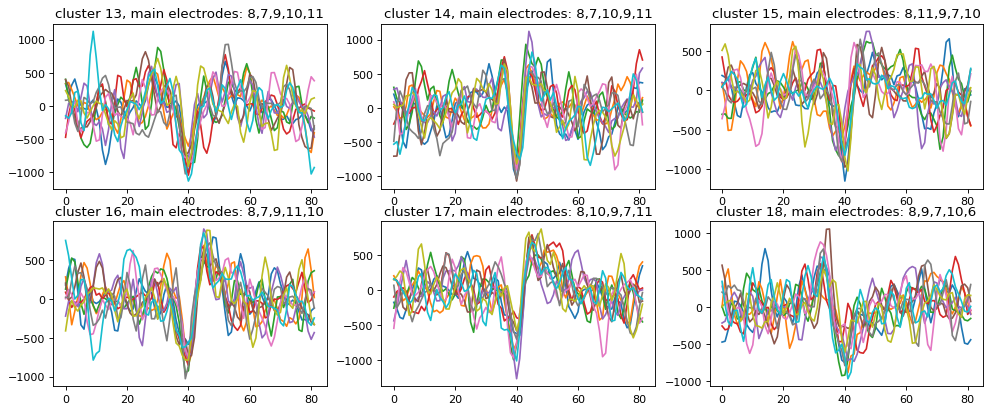

In [12]:
cluster_offset = np.random.randint(25)
plot_waveforms(cluster_offset=cluster_offset, n_spikes_to_visualize=10)

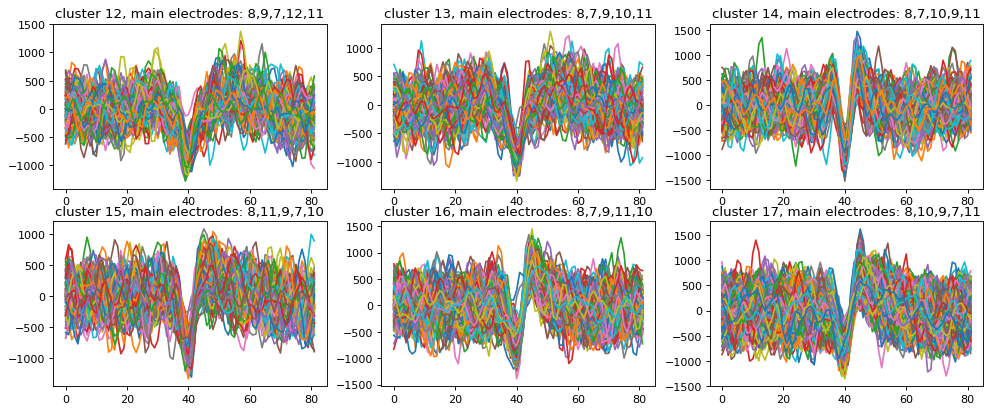

In [4]:
plot_waveforms(cluster_offset=cluster_offset)